In [47]:
#importando Librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

In [48]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [49]:
consumo = pd.read_excel('./data/Dataset_GCRNO_05052021.xlsx')
consumo

,FECHA,DEM_GCRNO_H0,DEM_GCRNO_H1,DEM_GCRNO_H2,DEM_GCRNO_H3,DEM_GCRNO_H4,DEM_GCRNO_H5,DEM_GCRNO_H6,DEM_GCRNO_H7,DEM_GCRNO_H8,DEM_GCRNO_H9,DEM_GCRNO_H10,DEM_GCRNO_H11,DEM_GCRNO_H12,DEM_GCRNO_H13,DEM_GCRNO_H14,DEM_GCRNO_H15,DEM_GCRNO_H16,DEM_GCRNO_H17,DEM_GCRNO_H18,DEM_GCRNO_H19,DEM_GCRNO_H20,DEM_GCRNO_H21,DEM_GCRNO_H22,DEM_GCRNO_H23,Consumo_GCRNO,DIA,DMAX_TARDE_GCRNO,DMAX_NOCHE_GCRNO,DMIN_GCRNO,TMAX-CAB,TMAX-HMO,TMAX-OBR,TMAX-LMO,TMAX-CUL,TMIN-CAB,TMIN-HMO,TMIN-OBR,TMIN-LMO,TMIN-CUL,PREC_HMO_mm,PREC_OBR_mm,PREC_LMO_mm,PREC_CUL_mm
0,2015-01-01,1568.654,1514.656,1475.261,1444.489,1411.600,1386.635,1373.938,1374.069,1329.244,1335.027,1361.162,1390.284,1411.983,1413.934,1401.547,1392.802,1386.141,1390.990,1469.534,1620.665,1647.553,1633.332,1591.287,1522.941,33324.787,Jueves,1469.534,1647.553,1329.244,12.30,17.4,24.8,22.8,28.3,1.2,7.7,13.8,15.4,20.2,0.0,0.0,0.0,0.0
1,2015-01-02,1458.123,1412.666,1381.931,1360.817,1343.881,1354.203,1387.246,1446.264,1483.783,1565.900,1637.856,1680.336,1713.371,1727.845,1721.433,1724.181,1720.010,1717.034,1760.571,1861.713,1862.586,1820.332,1750.791,1683.802,36892.873,Viernes,1760.571,1862.586,1343.881,12.81,14.8,21.1,17.9,22.9,-0.8,3.5,8.3,9.0,12.9,0.0,0.0,0.0,0.0
2,2015-01-03,1586.469,1517.111,1484.446,1455.278,1448.833,1451.100,1484.352,1506.457,1520.890,1593.905,1650.786,1695.830,1722.366,1729.634,1724.085,1703.412,1684.540,1670.032,1724.760,1866.993,1849.466,1813.672,1757.484,1695.193,37641.901,Sábado,1729.634,1866.993,1448.833,17.00,19.4,23.1,20.0,27.5,-0.2,3.4,4.6,5.9,9.1,0.0,0.0,0.0,0.0
3,2015-01-04,1613.375,1538.360,1491.286,1463.137,1445.941,1440.350,1447.685,1457.181,1448.322,1506.450,1571.583,1606.393,1625.688,1627.741,1624.556,1617.114,1610.836,1605.015,1647.744,1814.289,1832.375,1812.007,1752.897,1654.567,36600.325,Domingo,1647.744,1832.375,1440.350,21.30,27.0,31.1,24.2,32.6,1.9,5.6,8.5,8.2,12.7,0.0,0.0,0.0,0.0
4,2015-01-05,1554.568,1484.382,1447.962,1416.195,1412.756,1422.446,1466.906,1526.890,1573.006,1655.557,1720.737,1780.088,1815.852,1824.726,1839.620,1841.746,1826.263,1814.675,1846.025,1959.640,1958.427,1923.634,1841.551,1755.341,38953.652,Lunes,1846.025,1959.640,1412.756,24.50,29.8,33.6,25.5,35.3,4.6,7.0,9.5,11.5,16.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,2021-04-30,2846.000,2729.000,2613.000,2538.000,2463.000,2443.000,2415.000,2400.000,2495.000,2617.000,2696.000,2781.000,2868.000,2943.000,3026.000,3085.000,3129.000,3105.000,3011.000,2903.000,2962.000,2993.000,3013.000,2972.000,64074.000,Viernes,3129.000,3013.000,2400.000,37.00,36.5,38.0,34.0,35.0,14.0,19.5,18.0,14.0,17.0,0.0,0.0,0.0,0.0
2312,2021-05-01,2893.000,2791.000,2686.000,2584.000,2494.000,2450.000,2373.000,2291.000,2335.000,2412.000,2478.000,2557.000,2635.000,2731.000,2842.000,2915.000,2970.000,2984.000,2934.000,2848.000,2920.000,2968.000,2966.000,2908.000,62057.000,Sábado,2984.000,2968.000,2291.000,35.00,39.0,37.0,35.0,35.5,14.0,20.0,19.0,17.0,17.5,0.0,0.0,0.0,0.0
2313,2021-05-02,2825.000,2724.000,2635.000,2543.000,2469.000,2423.000,2356.000,2282.000,2315.000,2374.000,2437.000,2492.000,2554.000,2622.000,2706.000,2788.000,2845.000,2843.000,2793.000,2734.000,2867.000,2966.000,2994.000,2948.000,60587.000,Domingo,2845.000,2994.000,2282.000,33.00,36.0,35.0,34.0,35.0,14.0,17.5,18.0,17.0,18.0,0.0,0.0,0.0,0.0
2314,2021-05-03,2836.000,2712.000,2606.000,2514.000,2433.000,2400.000,2360.000,2323.000,2453.000,2587.000,2679.000,2760.000,2825.000,2897.000,3011.000,3077.000,3126.000,3105.000,2999.000,2887.000,2985.000,3058.000,3080.000,3023.000,63713.000,Lunes,3126.000,3080.000,2323.000,31.00,32.5,32.0,31.0,36.0,15.0,15.5,14.0,20.0,19.5,0.0,0.0,0.0,0.0


In [50]:
consumo_data = consumo.loc[:, "FECHA":"DEM_GCRNO_H23"]

In [51]:
consumo_data

,FECHA,DEM_GCRNO_H0,DEM_GCRNO_H1,DEM_GCRNO_H2,DEM_GCRNO_H3,DEM_GCRNO_H4,DEM_GCRNO_H5,DEM_GCRNO_H6,DEM_GCRNO_H7,DEM_GCRNO_H8,DEM_GCRNO_H9,DEM_GCRNO_H10,DEM_GCRNO_H11,DEM_GCRNO_H12,DEM_GCRNO_H13,DEM_GCRNO_H14,DEM_GCRNO_H15,DEM_GCRNO_H16,DEM_GCRNO_H17,DEM_GCRNO_H18,DEM_GCRNO_H19,DEM_GCRNO_H20,DEM_GCRNO_H21,DEM_GCRNO_H22,DEM_GCRNO_H23
0,2015-01-01,1568.654,1514.656,1475.261,1444.489,1411.600,1386.635,1373.938,1374.069,1329.244,1335.027,1361.162,1390.284,1411.983,1413.934,1401.547,1392.802,1386.141,1390.990,1469.534,1620.665,1647.553,1633.332,1591.287,1522.941
1,2015-01-02,1458.123,1412.666,1381.931,1360.817,1343.881,1354.203,1387.246,1446.264,1483.783,1565.900,1637.856,1680.336,1713.371,1727.845,1721.433,1724.181,1720.010,1717.034,1760.571,1861.713,1862.586,1820.332,1750.791,1683.802
2,2015-01-03,1586.469,1517.111,1484.446,1455.278,1448.833,1451.100,1484.352,1506.457,1520.890,1593.905,1650.786,1695.830,1722.366,1729.634,1724.085,1703.412,1684.540,1670.032,1724.760,1866.993,1849.466,1813.672,1757.484,1695.193
3,2015-01-04,1613.375,1538.360,1491.286,1463.137,1445.941,1440.350,1447.685,1457.181,1448.322,1506.450,1571.583,1606.393,1625.688,1627.741,1624.556,1617.114,1610.836,1605.015,1647.744,1814.289,1832.375,1812.007,1752.897,1654.567
4,2015-01-05,1554.568,1484.382,1447.962,1416.195,1412.756,1422.446,1466.906,1526.890,1573.006,1655.557,1720.737,1780.088,1815.852,1824.726,1839.620,1841.746,1826.263,1814.675,1846.025,1959.640,1958.427,1923.634,1841.551,1755.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,2021-04-30,2846.000,2729.000,2613.000,2538.000,2463.000,2443.000,2415.000,2400.000,2495.000,2617.000,2696.000,2781.000,2868.000,2943.000,3026.000,3085.000,3129.000,3105.000,3011.000,2903.000,2962.000,2993.000,3013.000,2972.000
2312,2021-05-01,2893.000,2791.000,2686.000,2584.000,2494.000,2450.000,2373.000,2291.000,2335.000,2412.000,2478.000,2557.000,2635.000,2731.000,2842.000,2915.000,2970.000,2984.000,2934.000,2848.000,2920.000,2968.000,2966.000,2908.000
2313,2021-05-02,2825.000,2724.000,2635.000,2543.000,2469.000,2423.000,2356.000,2282.000,2315.000,2374.000,2437.000,2492.000,2554.000,2622.000,2706.000,2788.000,2845.000,2843.000,2793.000,2734.000,2867.000,2966.000,2994.000,2948.000
2314,2021-05-03,2836.000,2712.000,2606.000,2514.000,2433.000,2400.000,2360.000,2323.000,2453.000,2587.000,2679.000,2760.000,2825.000,2897.000,3011.000,3077.000,3126.000,3105.000,2999.000,2887.000,2985.000,3058.000,3080.000,3023.000


In [52]:
#realizando trasnposicion con stack, colocando los nombres correspondientes a las nuevas columnas
consumo_data = consumo_data.set_index('FECHA')
consumo_data = pd.concat([consumo_data.stack()], axis=1)
consumo_data.columns = ['DEMANDA']
consumo_data = consumo_data.reset_index().rename(columns={'level_1': 'HORA'})
consumo_data

,FECHA,HORA,DEMANDA
0,2015-01-01,DEM_GCRNO_H0,1568.654
1,2015-01-01,DEM_GCRNO_H1,1514.656
2,2015-01-01,DEM_GCRNO_H2,1475.261
3,2015-01-01,DEM_GCRNO_H3,1444.489
4,2015-01-01,DEM_GCRNO_H4,1411.600
...,...,...,...
55579,2021-05-04,DEM_GCRNO_H19,2982.000
55580,2021-05-04,DEM_GCRNO_H20,3082.000
55581,2021-05-04,DEM_GCRNO_H21,3152.000
55582,2021-05-04,DEM_GCRNO_H22,3167.000


In [53]:
#cambiando las horas de H1..Hn a formato de horas
hora_group = list(consumo_data.HORA.unique())
hora_group
horas = ['0:00','1:00', '2:00', '3:00', '4:00', '5:00', '6:00', 
         '7:00', '8:00', '9:00', '10:00', '11:00', '12:00',
         '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', 
         '19:00', '20:00', '21:00', '22:00', '23:00']
consumo_data['HORA'].replace(hora_group, horas, inplace=True)
consumo_data

,FECHA,HORA,DEMANDA
0,2015-01-01,0:00,1568.654
1,2015-01-01,1:00,1514.656
2,2015-01-01,2:00,1475.261
3,2015-01-01,3:00,1444.489
4,2015-01-01,4:00,1411.600
...,...,...,...
55579,2021-05-04,19:00,2982.000
55580,2021-05-04,20:00,3082.000
55581,2021-05-04,21:00,3152.000
55582,2021-05-04,22:00,3167.000


In [54]:
consumo_data['FECHA_new'] = consumo_data['FECHA'].astype(str)
consumo_data["FECHA-HORA"] = consumo_data["FECHA_new"] +' '+ consumo_data["HORA"]
consumo_data["FECHA-HORA"] = pd.to_datetime(consumo_data["FECHA-HORA"])
consumo_data

,FECHA,HORA,DEMANDA,FECHA_new,FECHA-HORA
0,2015-01-01,0:00,1568.654,2015-01-01,2015-01-01 00:00:00
1,2015-01-01,1:00,1514.656,2015-01-01,2015-01-01 01:00:00
2,2015-01-01,2:00,1475.261,2015-01-01,2015-01-01 02:00:00
3,2015-01-01,3:00,1444.489,2015-01-01,2015-01-01 03:00:00
4,2015-01-01,4:00,1411.600,2015-01-01,2015-01-01 04:00:00
...,...,...,...,...,...
55579,2021-05-04,19:00,2982.000,2021-05-04,2021-05-04 19:00:00
55580,2021-05-04,20:00,3082.000,2021-05-04,2021-05-04 20:00:00
55581,2021-05-04,21:00,3152.000,2021-05-04,2021-05-04 21:00:00
55582,2021-05-04,22:00,3167.000,2021-05-04,2021-05-04 22:00:00


In [55]:
consumo_data.dtypes

FECHA         datetime64[ns]
HORA                  object
DEMANDA              float64
FECHA_new             object
FECHA-HORA    datetime64[ns]
dtype: object

In [56]:
consumo_data = consumo_data[["FECHA-HORA", "DEMANDA"]]
consumo_data

,FECHA-HORA,DEMANDA
0,2015-01-01 00:00:00,1568.654
1,2015-01-01 01:00:00,1514.656
2,2015-01-01 02:00:00,1475.261
3,2015-01-01 03:00:00,1444.489
4,2015-01-01 04:00:00,1411.600
...,...,...
55579,2021-05-04 19:00:00,2982.000
55580,2021-05-04 20:00:00,3082.000
55581,2021-05-04 21:00:00,3152.000
55582,2021-05-04 22:00:00,3167.000


In [57]:
datos = len(consumo_data)
datos

55584

In [58]:
ochenta = datos*0.8
ochenta

44467.200000000004

In [59]:
consumo_data.iloc[0:44467,:]

,FECHA-HORA,DEMANDA
0,2015-01-01 00:00:00,1568.654
1,2015-01-01 01:00:00,1514.656
2,2015-01-01 02:00:00,1475.261
3,2015-01-01 03:00:00,1444.489
4,2015-01-01 04:00:00,1411.600
...,...,...
44462,2020-01-27 14:00:00,2294.000
44463,2020-01-27 15:00:00,2303.000
44464,2020-01-27 16:00:00,2307.000
44465,2020-01-27 17:00:00,2282.000


In [60]:
train_data_qty = len(consumo_data[consumo_data["FECHA-HORA"] < '2020-01-27 00:00:00'])
train_data_qty

44448

In [61]:
consumo_data.set_index("FECHA-HORA", inplace=True)
consumo_data=consumo_data.asfreq('h')
consumo_data

,DEMANDA
FECHA-HORA,
2015-01-01 00:00:00,1568.654
2015-01-01 01:00:00,1514.656
2015-01-01 02:00:00,1475.261
2015-01-01 03:00:00,1444.489
2015-01-01 04:00:00,1411.600
...,...
2021-05-04 19:00:00,2982.000
2021-05-04 20:00:00,3082.000
2021-05-04 21:00:00,3152.000


In [62]:
consumo_data.isna().sum()

DEMANDA    0
dtype: int64

<AxesSubplot:xlabel='FECHA-HORA'>

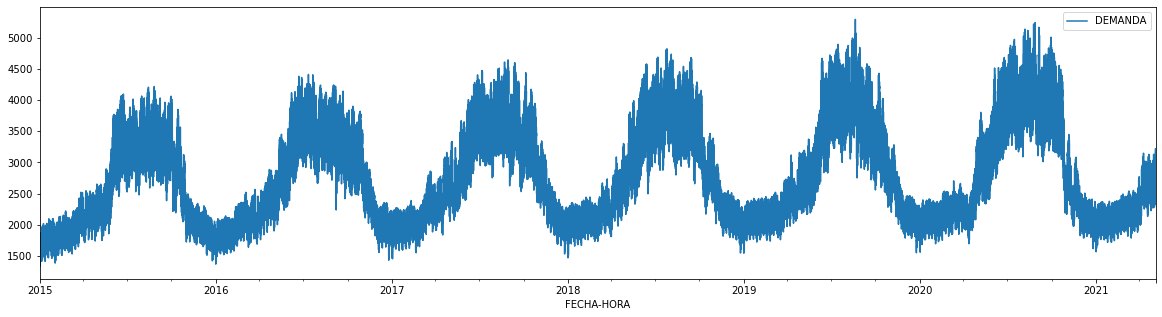

In [63]:
consumo_data.plot(figsize=(20,5))

<AxesSubplot:xlabel='FECHA-HORA'>

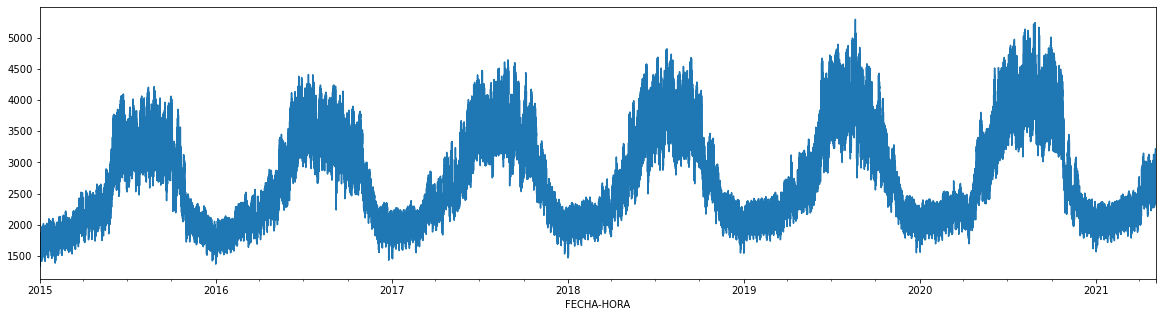

In [64]:
results = seasonal_decompose(consumo_data["DEMANDA"])
results.observed.plot(figsize=(20,5))

<AxesSubplot:xlabel='FECHA-HORA'>

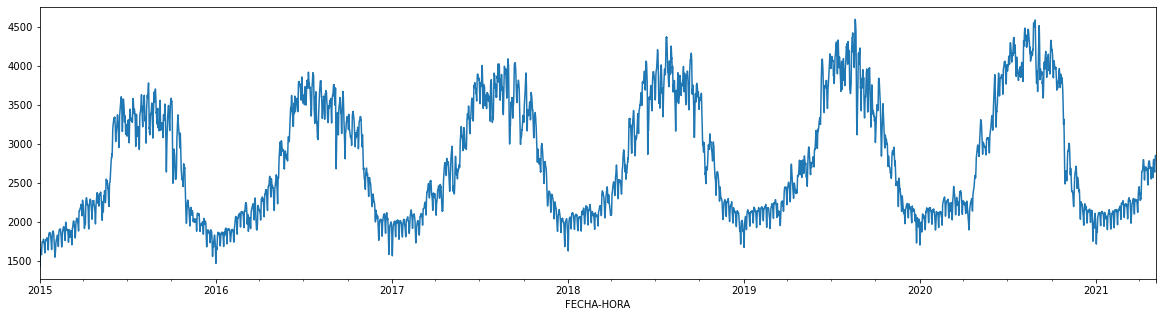

In [65]:
results.trend.plot(figsize=(20,5))

<AxesSubplot:xlabel='FECHA-HORA'>

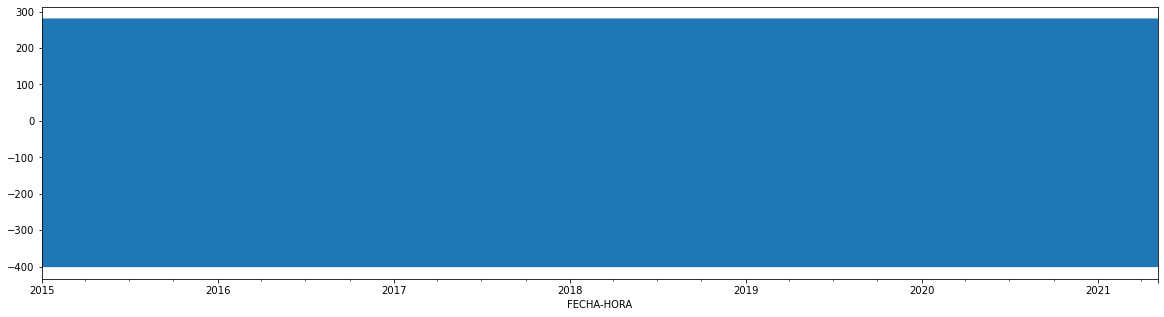

In [66]:
results.seasonal.plot(figsize=(20,5))

<AxesSubplot:xlabel='FECHA-HORA'>

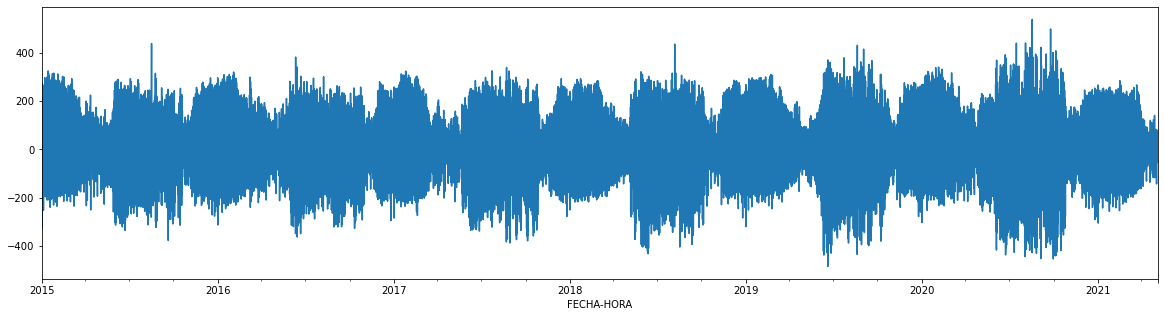

In [67]:
results.resid.plot(figsize=(20,5))

### Train Test Split

In [68]:
registros = len(consumo_data)
registros

55584

In [69]:
dias = len(consumo_data)/24
dias

2316.0

In [70]:
years = dias/365
years

6.345205479452055

In [71]:
train_set = consumo_data.iloc[:train_data_qty]
test_set = consumo_data[train_data_qty:]

In [72]:
train_set

,DEMANDA
FECHA-HORA,
2015-01-01 00:00:00,1568.654
2015-01-01 01:00:00,1514.656
2015-01-01 02:00:00,1475.261
2015-01-01 03:00:00,1444.489
2015-01-01 04:00:00,1411.600
...,...
2020-01-26 19:00:00,2173.000
2020-01-26 20:00:00,2188.000
2020-01-26 21:00:00,2184.000


In [73]:
test_set

,DEMANDA
FECHA-HORA,
2020-01-27 00:00:00,1943.000
2020-01-27 01:00:00,1860.000
2020-01-27 02:00:00,1818.000
2020-01-27 03:00:00,1789.000
2020-01-27 04:00:00,1777.000
...,...
2021-05-04 19:00:00,2982.000
2021-05-04 20:00:00,3082.000
2021-05-04 21:00:00,3152.000


In [74]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)
testing_set_scaled = sc.fit_transform(test_set)

In [75]:
training_set_scaled

array([[0.06036899],
       [0.046753  ],
       [0.03681926],
       ...,
       [0.21553299],
       [0.2036816 ],
       [0.18174391]])

## Times Series Generator
Este generador toma una secuencua de puntos de datos (como una serie temporal) espaciados en intervalos iguales, teniendo en cuenta otros parámetros de series temporales, para producir batches para el entrenamiento /validación

In [76]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [77]:
n_input = 2
n_features = 1
generator = TimeseriesGenerator(training_set_scaled, training_set_scaled, length = n_input, batch_size=1)

In [78]:

n_timestamp = 48


#def data_split(sequence, n_timestamp):
#    X = []
#    y = []
#    qtyregistros = len(sequence)
#    for i in range(n_timestamp, qtyregistros):
#       X.append(sequence[i-n_timestamp:i,0])
#       y.append(sequence[i,0])
#    return np.array(X), np.array(y)

def data_split(sequence, n_timestamp):
    X = []
    y = []
    for i in range(len(sequence)):
        end_ix = i + n_timestamp
        if end_ix > len(sequence)-1:
            break
        # i to end_ix as input
        # end_ix as target output
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [79]:
X_train, y_train = data_split(training_set_scaled, n_timestamp)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test, y_test = data_split(testing_set_scaled, n_timestamp)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [80]:
X_train.shape

(44400, 48, 1)

In [81]:
X_test.shape

(11088, 48, 1)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from numpy import array

In [83]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu',input_shape = (X_train.shape[1], 1)))
model.add(Dense(units = 1))

model.compile(loss='mean_squared_error', 
              optimizer='adam')

In [84]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)
]

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [86]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32)
loss = history.history['loss']
epochs = range(len(loss))

Epoch 1/25
1388/1388 [==============================] - 14s 10ms/step - loss: 0.0135
Epoch 2/25
1388/1388 [==============================] - 14s 10ms/step - loss: 5.1455e-04
Epoch 3/25
1388/1388 [==============================] - 14s 10ms/step - loss: 2.6898e-04
Epoch 4/25
1388/1388 [==============================] - 14s 10ms/step - loss: 1.4778e-04
Epoch 5/25
1388/1388 [==============================] - 14s 10ms/step - loss: 1.3313e-04
Epoch 6/25
1388/1388 [==============================] - 14s 10ms/step - loss: 1.3718e-04
Epoch 7/25
1388/1388 [==============================] - 14s 10ms/step - loss: 1.2979e-04
Epoch 8/25
1388/1388 [==============================] - 14s 10ms/step - loss: 1.2761e-04
Epoch 9/25
1388/1388 [==============================] - 14s 10ms/step - loss: 1.2065e-04
Epoch 10/25
1388/1388 [==============================] - 14s 10ms/step - loss: 1.1327e-04
Epoch 11/25
1388/1388 [==============================] - 14s 10ms/step - loss: 1.0743e-04
Epoch 12/25
1388/1388 [

In [87]:
#
# Get predicted data
#
y_predicted = model.predict(X_test)

y_predicted

array([[0.1399799 ],
       [0.11362682],
       [0.10047171],
       ...,
       [0.4382988 ],
       [0.43092304],
       [0.42116976]], dtype=float32)

In [88]:
#
# 'De-normalize' the data
#
y_predicted_descaled = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

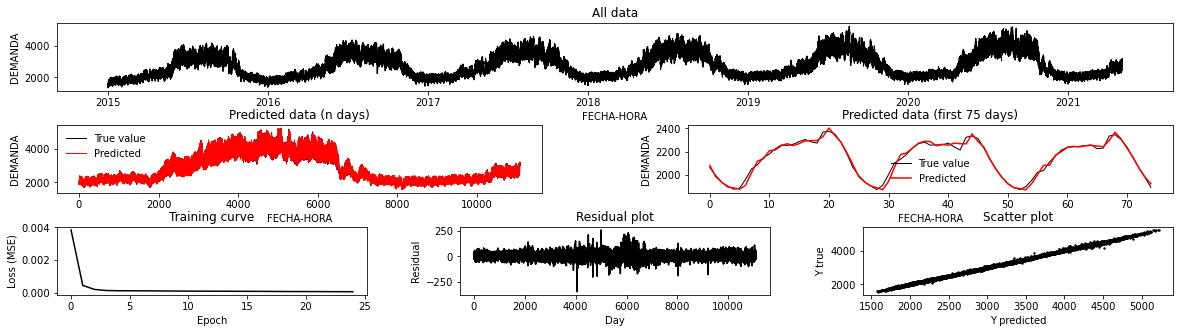

mse=949.63
r2=1.0


In [89]:
#
# Show results
#
plt.figure(figsize=(20,5))

plt.subplot(3, 1, 1)
plt.plot(consumo_data['DEMANDA'], color = 'black', linewidth=1, label = 'True value')
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("All data")


plt.subplot(3, 2, 3)
plt.plot(y_test_descaled, color = 'black', linewidth=1, label = 'True value')
plt.plot(y_predicted_descaled, color = 'red',  linewidth=1, label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("Predicted data (n days)")

plt.subplot(3, 2, 4)
plt.plot(y_test_descaled[0:75], color = 'black', linewidth=1, label = 'True value')
plt.plot(y_predicted_descaled[0:75], color = 'red', label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("Predicted data (first 75 days)")

plt.subplot(3, 3, 7)
plt.plot(epochs, loss, color='black')
plt.ylabel("Loss (MSE)")
plt.xlabel("Epoch")
plt.title("Training curve")

plt.subplot(3, 3, 8)
plt.plot(y_test_descaled-y_predicted_descaled, color='black')
plt.ylabel("Residual")
plt.xlabel("Day")
plt.title("Residual plot")

plt.subplot(3, 3, 9)
plt.scatter(y_predicted_descaled, y_test_descaled, s=2, color='black')
plt.ylabel("Y true")
plt.xlabel("Y predicted")
plt.title("Scatter plot")

plt.subplots_adjust(hspace = 0.5, wspace=0.3)
plt.show()



mse = mean_squared_error(y_test_descaled, y_predicted_descaled)
r2 = r2_score(y_test_descaled, y_predicted_descaled)
print("mse=" + str(round(mse,2)))
print("r2=" + str(round(r2,2)))


### MODELO II

In [90]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, activation='relu',input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.25))
model.add(LSTM(units = 50, return_sequences = True, activation='relu'))
model.add(Dropout(0.25))
model.add(LSTM(units = 50, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 1))

model.compile(loss='mean_squared_error', 
              optimizer='adam')

In [91]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 48, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 48, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [92]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 32)
loss = history.history['loss']
epochs = range(len(loss))

Epoch 1/25
1388/1388 [==============================] - 45s 31ms/step - loss: 0.0172
Epoch 2/25
1388/1388 [==============================] - 44s 32ms/step - loss: 0.0033
Epoch 3/25
1388/1388 [==============================] - 46s 33ms/step - loss: 0.0022
Epoch 4/25
1388/1388 [==============================] - 57s 41ms/step - loss: 0.0018
Epoch 5/25
1388/1388 [==============================] - 46s 33ms/step - loss: 0.0017
Epoch 6/25
1388/1388 [==============================] - 44s 32ms/step - loss: 0.0015
Epoch 7/25
1388/1388 [==============================] - 44s 32ms/step - loss: 0.0015
Epoch 8/25
1388/1388 [==============================] - 44s 32ms/step - loss: 0.0014
Epoch 9/25
1388/1388 [==============================] - 44s 32ms/step - loss: 0.0013
Epoch 10/25
1388/1388 [==============================] - 45s 32ms/step - loss: 0.0012
Epoch 11/25
1388/1388 [==============================] - 44s 32ms/step - loss: 0.0012
Epoch 12/25
1388/1388 [==============================] - 44s 32

In [93]:
#
# Get predicted data
#
y_predicted = model.predict(X_test)
# 'De-normalize' the data
#
y_predicted_descaled = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()


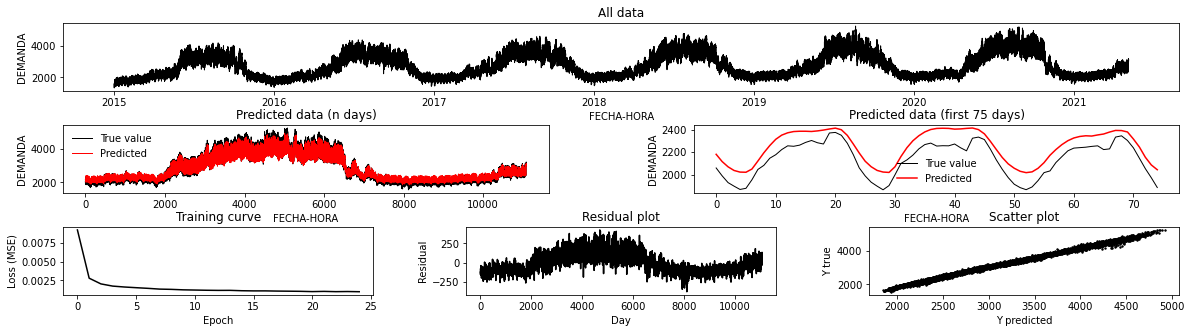

mse=15968.55
r2=0.98


In [94]:
#
# Show results
#
plt.figure(figsize=(20,5))

plt.subplot(3, 1, 1)
plt.plot(consumo_data['DEMANDA'], color = 'black', linewidth=1, label = 'True value')
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("All data")


plt.subplot(3, 2, 3)
plt.plot(y_test_descaled, color = 'black', linewidth=1, label = 'True value')
plt.plot(y_predicted_descaled, color = 'red',  linewidth=1, label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("Predicted data (n days)")

plt.subplot(3, 2, 4)
plt.plot(y_test_descaled[0:75], color = 'black', linewidth=1, label = 'True value')
plt.plot(y_predicted_descaled[0:75], color = 'red', label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("Predicted data (first 75 days)")

plt.subplot(3, 3, 7)
plt.plot(epochs, loss, color='black')
plt.ylabel("Loss (MSE)")
plt.xlabel("Epoch")
plt.title("Training curve")

plt.subplot(3, 3, 8)
plt.plot(y_test_descaled-y_predicted_descaled, color='black')
plt.ylabel("Residual")
plt.xlabel("Day")
plt.title("Residual plot")

plt.subplot(3, 3, 9)
plt.scatter(y_predicted_descaled, y_test_descaled, s=2, color='black')
plt.ylabel("Y true")
plt.xlabel("Y predicted")
plt.title("Scatter plot")

plt.subplots_adjust(hspace = 0.5, wspace=0.3)
plt.show()



mse = mean_squared_error(y_test_descaled, y_predicted_descaled)
r2 = r2_score(y_test_descaled, y_predicted_descaled)
print("mse=" + str(round(mse,2)))
print("r2=" + str(round(r2,2)))


### Modelo III

In [95]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.25))
model.add(LSTM(units = 50, activation='relu',input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.25))
model.add(Dense(units = 1))

model.compile(loss='mean_squared_error', 
              optimizer='sgd')

In [96]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 48, 50)            10400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 48, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [97]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 64)
loss = history.history['loss']
epochs = range(len(loss))

Epoch 1/25
694/694 [==============================] - 22s 30ms/step - loss: 0.0439
Epoch 2/25
694/694 [==============================] - 21s 30ms/step - loss: 0.0154
Epoch 3/25
694/694 [==============================] - 22s 32ms/step - loss: 0.0086
Epoch 4/25
694/694 [==============================] - 23s 32ms/step - loss: 0.0082
Epoch 5/25
694/694 [==============================] - 22s 32ms/step - loss: 0.0080
Epoch 6/25
694/694 [==============================] - 22s 32ms/step - loss: 0.0080
Epoch 7/25
694/694 [==============================] - 23s 32ms/step - loss: 0.0078
Epoch 8/25
694/694 [==============================] - 22s 32ms/step - loss: 0.0076
Epoch 9/25
694/694 [==============================] - 22s 31ms/step - loss: 0.0075
Epoch 10/25
694/694 [==============================] - 22s 31ms/step - loss: 0.0074
Epoch 11/25
694/694 [==============================] - 23s 33ms/step - loss: 0.0075
Epoch 12/25
694/694 [==============================] - 23s 33ms/step - loss: 0.0074
E

In [98]:
y_predicted = model.predict(X_test)
#
# 'De-normalize' the data
#
y_predicted_descaled = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

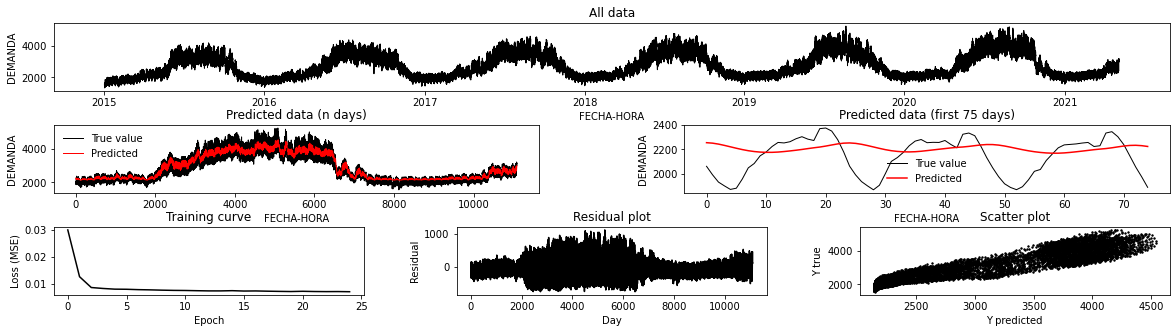

mse=104492.34
r2=0.86


In [99]:
#
# Show results
#
plt.figure(figsize=(20,5))

plt.subplot(3, 1, 1)
plt.plot(consumo_data['DEMANDA'], color = 'black', linewidth=1, label = 'True value')
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("All data")


plt.subplot(3, 2, 3)
plt.plot(y_test_descaled, color = 'black', linewidth=1, label = 'True value')
plt.plot(y_predicted_descaled, color = 'red',  linewidth=1, label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("Predicted data (n days)")

plt.subplot(3, 2, 4)
plt.plot(y_test_descaled[0:75], color = 'black', linewidth=1, label = 'True value')
plt.plot(y_predicted_descaled[0:75], color = 'red', label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("Predicted data (first 75 days)")

plt.subplot(3, 3, 7)
plt.plot(epochs, loss, color='black')
plt.ylabel("Loss (MSE)")
plt.xlabel("Epoch")
plt.title("Training curve")

plt.subplot(3, 3, 8)
plt.plot(y_test_descaled-y_predicted_descaled, color='black')
plt.ylabel("Residual")
plt.xlabel("Day")
plt.title("Residual plot")

plt.subplot(3, 3, 9)
plt.scatter(y_predicted_descaled, y_test_descaled, s=2, color='black')
plt.ylabel("Y true")
plt.xlabel("Y predicted")
plt.title("Scatter plot")

plt.subplots_adjust(hspace = 0.5, wspace=0.3)
plt.show()



mse = mean_squared_error(y_test_descaled, y_predicted_descaled)
r2 = r2_score(y_test_descaled, y_predicted_descaled)
print("mse=" + str(round(mse,2)))
print("r2=" + str(round(r2,2)))

### Modelo IV

In [100]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.25))
model.add(LSTM(units = 50, activation='sigmoid', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.25))
model.add(LSTM(units = 50, activation='sigmoid',input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.25))
model.add(Dense(units = 1))

model.compile(loss='mean_squared_error', 
              optimizer='adamax')

In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 48, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 48, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 48, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 48, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [102]:
history = model.fit(X_train, y_train, epochs = 25, batch_size = 64)
loss = history.history['loss']
epochs = range(len(loss))

Epoch 1/25
694/694 [==============================] - 34s 46ms/step - loss: 0.0649
Epoch 2/25
694/694 [==============================] - 34s 50ms/step - loss: 0.0114
Epoch 3/25
694/694 [==============================] - 33s 47ms/step - loss: 0.0086
Epoch 4/25
694/694 [==============================] - 34s 48ms/step - loss: 0.0065
Epoch 5/25
694/694 [==============================] - 33s 47ms/step - loss: 0.0045
Epoch 6/25
694/694 [==============================] - 32s 45ms/step - loss: 0.0040
Epoch 7/25
694/694 [==============================] - 33s 48ms/step - loss: 0.0035
Epoch 8/25
694/694 [==============================] - 34s 49ms/step - loss: 0.0032
Epoch 9/25
694/694 [==============================] - 34s 49ms/step - loss: 0.0030
Epoch 10/25
694/694 [==============================] - 32s 47ms/step - loss: 0.0028
Epoch 11/25
694/694 [==============================] - 32s 46ms/step - loss: 0.0026
Epoch 12/25
694/694 [==============================] - 34s 48ms/step - loss: 0.0026
E

In [103]:
y_predicted = model.predict(X_test)
#
# 'De-normalize' the data
#
y_predicted_descaled = sc.inverse_transform(y_predicted)
y_train_descaled = sc.inverse_transform(y_train)
y_test_descaled = sc.inverse_transform(y_test)
y_pred = y_predicted.ravel()
y_pred = [round(yx, 2) for yx in y_pred]
y_tested = y_test.ravel()

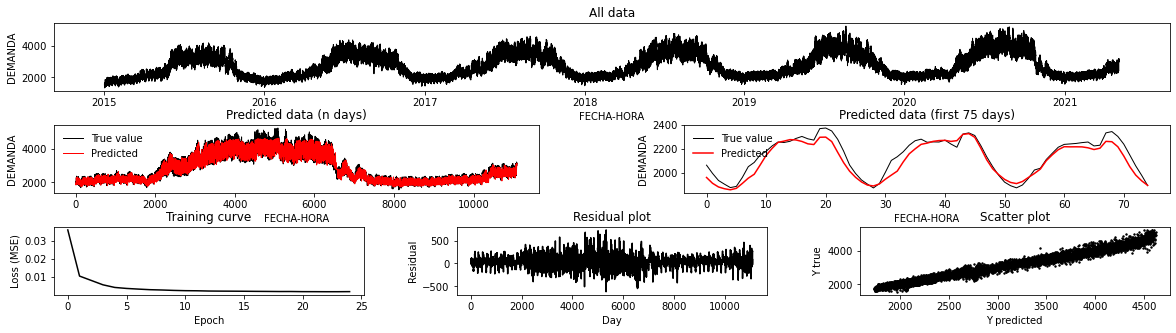

mse=19288.03
r2=0.97


In [104]:
#
# Show results
#
plt.figure(figsize=(20,5))

plt.subplot(3, 1, 1)
plt.plot(consumo_data['DEMANDA'], color = 'black', linewidth=1, label = 'True value')
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("All data")


plt.subplot(3, 2, 3)
plt.plot(y_test_descaled, color = 'black', linewidth=1, label = 'True value')
plt.plot(y_predicted_descaled, color = 'red',  linewidth=1, label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("Predicted data (n days)")

plt.subplot(3, 2, 4)
plt.plot(y_test_descaled[0:75], color = 'black', linewidth=1, label = 'True value')
plt.plot(y_predicted_descaled[0:75], color = 'red', label = 'Predicted')
plt.legend(frameon=False)
plt.ylabel("DEMANDA")
plt.xlabel("FECHA-HORA")
plt.title("Predicted data (first 75 days)")

plt.subplot(3, 3, 7)
plt.plot(epochs, loss, color='black')
plt.ylabel("Loss (MSE)")
plt.xlabel("Epoch")
plt.title("Training curve")

plt.subplot(3, 3, 8)
plt.plot(y_test_descaled-y_predicted_descaled, color='black')
plt.ylabel("Residual")
plt.xlabel("Day")
plt.title("Residual plot")

plt.subplot(3, 3, 9)
plt.scatter(y_predicted_descaled, y_test_descaled, s=2, color='black')
plt.ylabel("Y true")
plt.xlabel("Y predicted")
plt.title("Scatter plot")

plt.subplots_adjust(hspace = 0.5, wspace=0.3)
plt.show()



mse = mean_squared_error(y_test_descaled, y_predicted_descaled)
r2 = r2_score(y_test_descaled, y_predicted_descaled)
print("mse=" + str(round(mse,2)))
print("r2=" + str(round(r2,2)))